# Gastos Rochester

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline

In [2]:
gastos = pd.read_csv('Rochester_gastos.csv')

In [3]:
gastos.head()

,Fecha,Lugar,Categoria,Sub_categoria,Total
0,2/1/2020,Tops,Supermercado,Comida,63.69
1,2/1/2020,Dollar General,Auto,Otros,21.28
2,2/1/2020,Nissan,Auto,Otros,9.18
3,2/1/2020,Dragon Palace,Restaurant,Almuerzo,36.91
4,2/1/2020,Amazon,Unicos,Mesitas de luz,99.34


In [20]:
gastos.tail()

,Fecha,Lugar,Categoria,Sub_categoria,Total,Month,Day
167,2020-04-20,Google Drive,Servicios,Otros,1.99,4,20
168,2020-04-20,Amazon,Unicos,Sopapa,8.29,4,20
169,2020-04-22,Walmart,Supermercado,Unicos,24.53,4,22
170,2020-04-22,Walmart,Supermercado,Higiene,37.01,4,22
171,2020-04-22,Walmart,Supermercado,Comida,213.81,4,22


In [4]:
gastos.dtypes

Fecha             object
Lugar             object
Categoria         object
Sub_categoria     object
Total            float64
dtype: object

In [5]:
gastos['Fecha']=pd.to_datetime(gastos['Fecha'])

In [6]:
gastos['Month']=gastos['Fecha'].dt.month

In [7]:
gastos['Day']=gastos['Fecha'].dt.day

In [8]:
gastos.shape

(172, 7)

In [9]:
gastos[gastos.Month==2].Total.sum()

4522.960000000001

In [10]:
gastos[gastos.Month==3].Total.sum()

3381.26

In [11]:
gastos[gastos.Month==4].Total.sum()

1743.7599999999998

In [12]:
categorias = gastos.groupby(['Categoria','Month']).Total.sum()

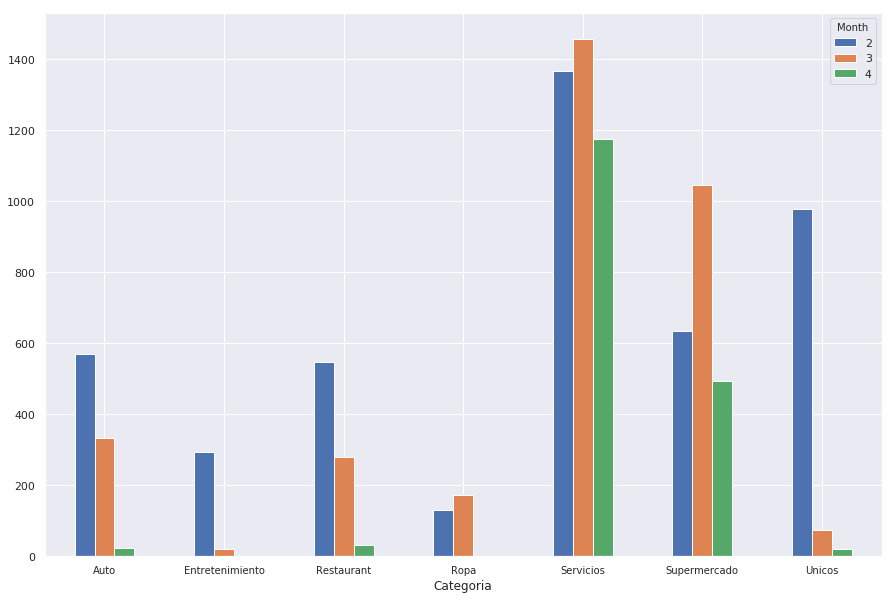

In [13]:
categorias.unstack().plot(kind='bar', stacked=False,figsize=[15,10])
plt.xticks(
    rotation=0,
   # horizontalalignment='right',
   # fontweight='light',
    fontsize='medium',
);

In [14]:
gastos.groupby(['Categoria','Sub_categoria','Month']).Total.sum()

Categoria        Sub_categoria     Month
Auto             Arreglos          2         362.65
                 Insurance         3         265.67
                 Lavado            2          23.71
                                   4          23.71
                 Nafta             2         115.75
                                   3          41.18
                 Otros             2          43.12
                 Peajes            2          25.00
                                   3          25.00
Entretenimiento  Bowling           2          30.00
                                   3          21.00
                 Cine              2          57.80
                 Teatro            2         205.10
Restaurant       Almuerzo          2         188.35
                                   3         125.62
                 Cena              2         314.74
                                   3         109.76
                                   4          31.15
                 Otros 

In [15]:
#gastos[gastos.Categoria == 'Restaurant'].groupby(['Lugar']).Total.sum()

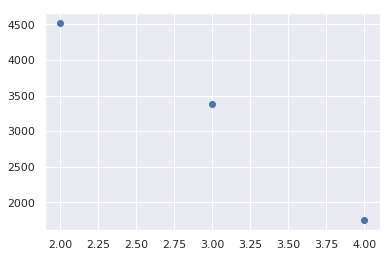

In [16]:
plt.plot(gastos.groupby('Month').Total.sum(),'o');

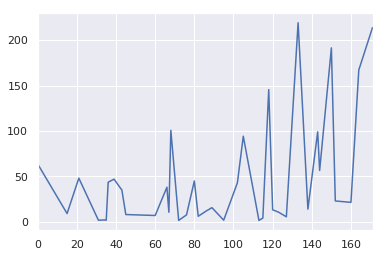

In [17]:
gastos[gastos.Sub_categoria == 'Comida'].Total.plot()

In [18]:
comida = gastos[gastos.Sub_categoria == 'Comida']

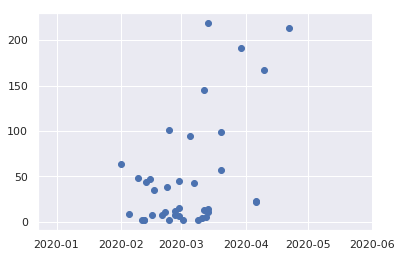

In [19]:
plt.scatter(x=comida['Fecha'],y=comida['Total'])